In [2]:
import pandas as pd
df = pd.read_csv('../data/V2.csv', encoding='utf-8', delimiter=';')
del df[df.columns[0]]
df.head()

,Status,Credit.history,Purpose,Savings.account,Installment.rate,Personal.status.and.sex,Number.of.existing.credits,Job,Number.of.people,foreign.worker,Class
0,<0 DM,critical account/other credits existing (not a...,domestic appliances,unknown/ no savings account,4,male: single,2,skilled employee / official,1,yes,1
1,0-200 DM,existing credits paid back duly till now,domestic appliances,<100 DM,2,female: divorced/separated/married,1,skilled employee / official,1,yes,2
2,no checking account,critical account/other credits existing (not a...,(vacation - does not exist?),<100 DM,2,male: single,1,unskilled - resident,2,yes,1
3,<0 DM,existing credits paid back duly till now,radio/television,<100 DM,2,male: single,1,skilled employee / official,2,yes,1
4,<0 DM,delay in paying off in the past,car (new),<100 DM,3,male: single,2,skilled employee / official,2,yes,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Status                      1000 non-null   object
 1   Credit.history              1000 non-null   object
 2   Purpose                     1000 non-null   object
 3   Savings.account             1000 non-null   object
 4   Installment.rate            1000 non-null   int64 
 5   Personal.status.and.sex     1000 non-null   object
 6   Number.of.existing.credits  1000 non-null   int64 
 7   Job                         1000 non-null   object
 8   Number.of.people            1000 non-null   int64 
 9   foreign.worker              1000 non-null   object
 10  Class                       1000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [4]:
replace_map = {}
for column in df.columns:
    labels = df[column].astype('category').cat.categories.tolist()
    replace_map_temp = {column : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    replace_map = {**replace_map, **replace_map_temp}

In [5]:
replace_map

{'Status': {'0-200 DM': 1,
  '<0 DM': 2,
  '>=200 DM': 3,
  'no checking account': 4},
 'Credit.history': {'all credits at this bank paid back duly': 1,
  'critical account/other credits existing (not at this bank)': 2,
  'delay in paying off in the past': 3,
  'existing credits paid back duly till now': 4,
  'no credits taken/all credits paid back duly': 5},
 'Purpose': {'(vacation - does not exist?)': 1,
  'business': 2,
  'car (new)': 3,
  'car (used)': 4,
  'domestic appliances': 5,
  'education': 6,
  'furniture/equipment': 7,
  'radio/television': 8,
  'repairs': 9,
  'retraining': 10},
 'Savings.account': {'100-500 DM': 1,
  '500-1000 DM': 2,
  '<100 DM': 3,
  '>=1000 DM': 4,
  'unknown/ no savings account': 5},
 'Installment.rate': {1: 1, 2: 2, 3: 3, 4: 4},
 'Personal.status.and.sex': {'female: divorced/separated/married': 1,
  'male: divorced/separated': 2,
  'male: married/widowed': 3,
  'male: single': 4},
 'Number.of.existing.credits': {1: 1, 2: 2, 3: 3, 4: 4},
 'Job': {'ma

In [6]:
df_replace = df.copy()
df_replace.replace(replace_map, inplace=True)
df_replace.head()

,Status,Credit.history,Purpose,Savings.account,Installment.rate,Personal.status.and.sex,Number.of.existing.credits,Job,Number.of.people,foreign.worker,Class
0,2,2,5,5,4,4,2,2,1,2,1
1,1,4,5,3,2,1,1,2,1,2,2
2,4,2,1,3,2,4,1,4,2,2,1
3,2,4,8,3,2,4,1,2,2,2,1
4,2,3,3,3,3,4,2,2,2,2,2


In [7]:
corr_matrix = df_replace.corr()
corr_matrix

,Status,Credit.history,Purpose,Savings.account,Installment.rate,Personal.status.and.sex,Number.of.existing.credits,Job,Number.of.people,foreign.worker,Class
Status,1.000000,-0.110683,-0.007687,0.097452,0.029780,0.049073,0.084513,-0.029085,0.030417,-0.014658,-0.302406
Credit.history,-0.110683,1.000000,0.057882,-0.031958,-0.059779,-0.080282,-0.387820,-0.013921,-0.070008,0.000513,0.097054
Purpose,-0.007687,0.057882,1.000000,0.015848,0.003199,-0.097655,-0.089907,-0.001895,-0.113761,0.029228,-0.058483
Savings.account,0.097452,-0.031958,0.015848,1.000000,0.032940,0.035129,0.015568,-0.040662,0.023693,-0.012566,-0.103133
Installment.rate,0.029780,-0.059779,0.003199,0.032940,1.000000,0.118367,0.021669,-0.078090,-0.071207,0.090024,0.072404
Personal.status.and.sex,0.049073,-0.080282,-0.097655,0.035129,0.118367,1.000000,0.112438,-0.040375,0.253574,-0.049099,-0.089535
Number.of.existing.credits,0.084513,-0.387820,-0.089907,0.015568,0.021669,0.112438,1.000000,0.004544,0.109667,0.009717,-0.045732
Job,-0.029085,-0.013921,-0.001895,-0.040662,-0.078090,-0.040375,0.004544,1.000000,0.127146,-0.100028,-0.032756
Number.of.people,0.030417,-0.070008,-0.113761,0.023693,-0.071207,0.253574,0.109667,0.127146,1.000000,-0.077071,-0.003015
foreign.worker,-0.014658,0.000513,0.029228,-0.012566,0.090024,-0.049099,0.009717,-0.100028,-0.077071,1.000000,0.082079


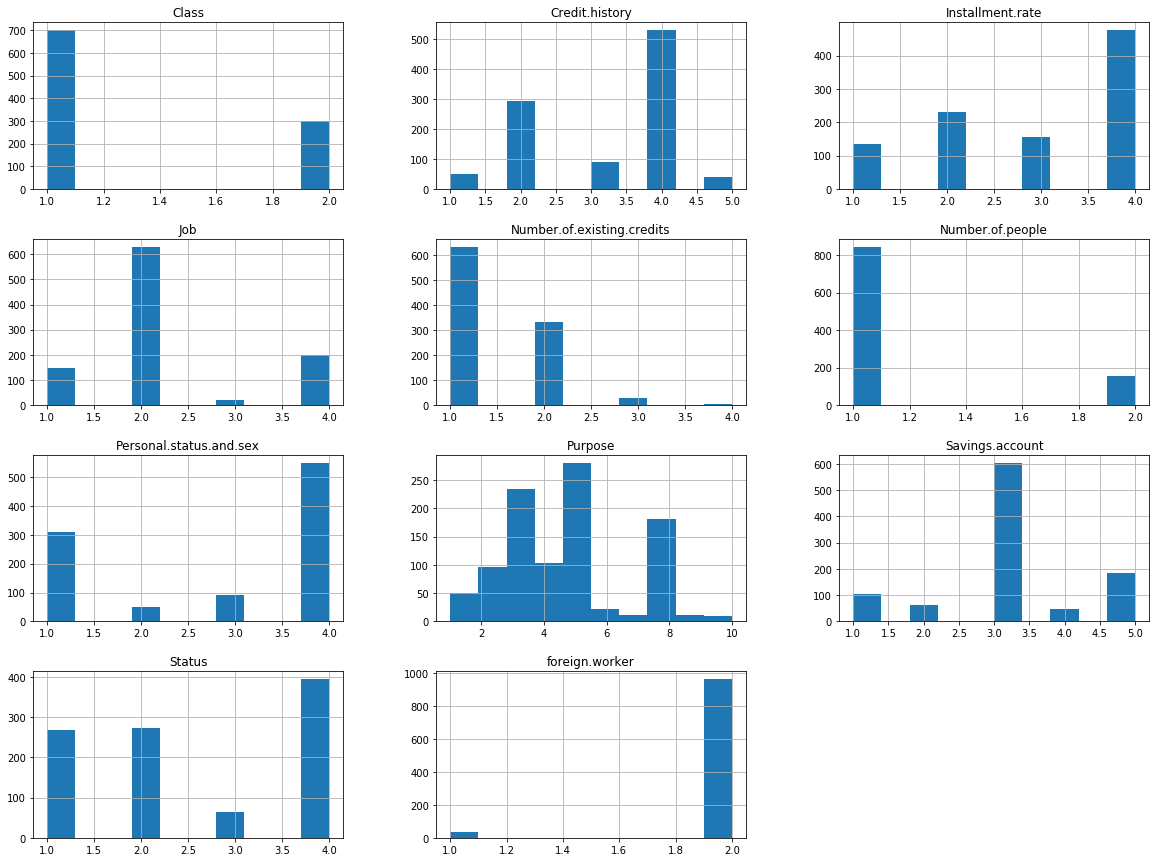

In [10]:
import matplotlib.pyplot as plt
df_replace.hist(figsize=(20,15))
plt.show()

In [11]:
contingency_table=pd.crosstab(df_replace["Purpose"],df_replace["Credit.history"])
contingency_table

Credit.history,1,2,3,4,5
Purpose,,,,,
1,3,19,5,23,0
2,7,19,23,33,15
3,12,78,17,120,7
4,5,36,8,51,3
5,9,80,20,167,4
6,0,6,3,11,2
7,2,3,2,4,1
8,8,50,10,106,7
9,1,1,0,10,0
